# Introduction 

## Motivation

In this tutorial, the topic of feature selection is explained on a chemical dataset containing information about the melting point (MP) of several molecules. Based on the structure of the molecule, several hundred features have been extracted, however some of them do not contain any useful information on the MP of molecules. 

When dealing with machine learning algorithms such as linear regression or decision trees for regression problems, we are eager to only use features that are important to the target variable and leave out unimportant ones, as they introduce bias to the model performance. In order to find those features that are useful to the target variable, we use several feature selection algorithms provided by the `sklearn` library. Then we train a multilinear regression model and a decision tree on both, on all features and the selected ones in order to see whether and how much the model performance has increased. 

## Feature selection

* Types of feature selction
* Advantages and disadvanteges
* Sources

# Implemenation

## Import modules 

In [1]:
# Standard
import pandas as pd
import numpy as np

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


# Feature slection
from sklearn.feature_selection import mutual_info_regression

# Performance estimator 
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Set plotstyle for fancier plots
plt.style.use('seaborn')

## Data import and preprocssing

In order to import the data, we use pandas `read_csv` function. To get a sneak peak of the dataframe, we just call the `head()` method. 

In [5]:
df=pd.read_csv('data/mp_data_desc.csv')
df.head(n=2)

,Unnamed: 0,compound,CSID,MP_Kelvin,SMILES,rdk_smiles,BalabanJ,BertzCT,Chi0,Chi0n,...,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,qed
0,0,(-)-levonorgestrel,12560.0,509.15,O=C4\C=C3/[C@@H]([C@H]2CC[C@]1([C@@H](CC[C@]1(...,C#C[C@]1(O)CC[C@H]2[C@@H]3CCC4=CC(=O)CC[C@@H]4...,1.671196,597.453052,16.242276,14.183525,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.746050
1,1,"(1E,4E)-1,5-Di(2-naphthyl)-1,4-pentadien-3-one",4523376.0,516.65,O=C(\C=C\c2ccc1c(cccc1)c2)\C=C\c2ccc1c(cccc1)c2,O=C(/C=C/c1ccc2ccccc2c1)/C=C/c1ccc2ccccc2c1,1.489886,1057.599472,17.769374,14.300553,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.400873


As there are some columns that we do not need for further research, we use the `drop()` method in order to get rid of them. Remebmer to set `axis=1` to drop actual columns, as the default `axis=0` drops rows. 

In [8]:
dataset_clean = df.drop(['Unnamed: 0', 'compound', 'CSID', 'SMILES', 'rdk_smiles'], axis=1)

In [9]:
dataset_clean.head()

,MP_Kelvin,BalabanJ,BertzCT,Chi0,Chi0n,Chi0v,Chi1,Chi1n,Chi1v,Chi2n,...,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,qed
0,509.15,1.671196,597.453052,16.242276,14.183525,14.183525,11.043772,9.478974,9.478974,8.395266,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.746050
1,516.65,1.489886,1057.599472,17.769374,14.300553,14.300553,12.775990,8.656260,8.656260,6.282212,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.400873
2,360.90,2.181267,541.858095,12.087576,9.206315,9.206315,8.270857,5.326448,5.326448,3.625417,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.641274
3,461.15,2.258880,691.777798,14.535169,10.392675,10.392675,9.575387,5.825887,5.825887,4.063838,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.399765
4,463.15,2.084842,580.396040,13.664926,10.537213,10.537213,9.185872,5.843521,5.843521,4.017618,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.672316


In [15]:
dataset_clean.fr_Imine.value_counts()

0.0    573
1.0     19
2.0      5
Name: fr_Imine, dtype: int64

In [6]:
# Get feature names for later identification
feature_names = dataset_clean.drop('MP_Kelvin', axis=1).columns

## Exploratory data analysis

In [7]:
dataset_clean.shape

(597, 201)

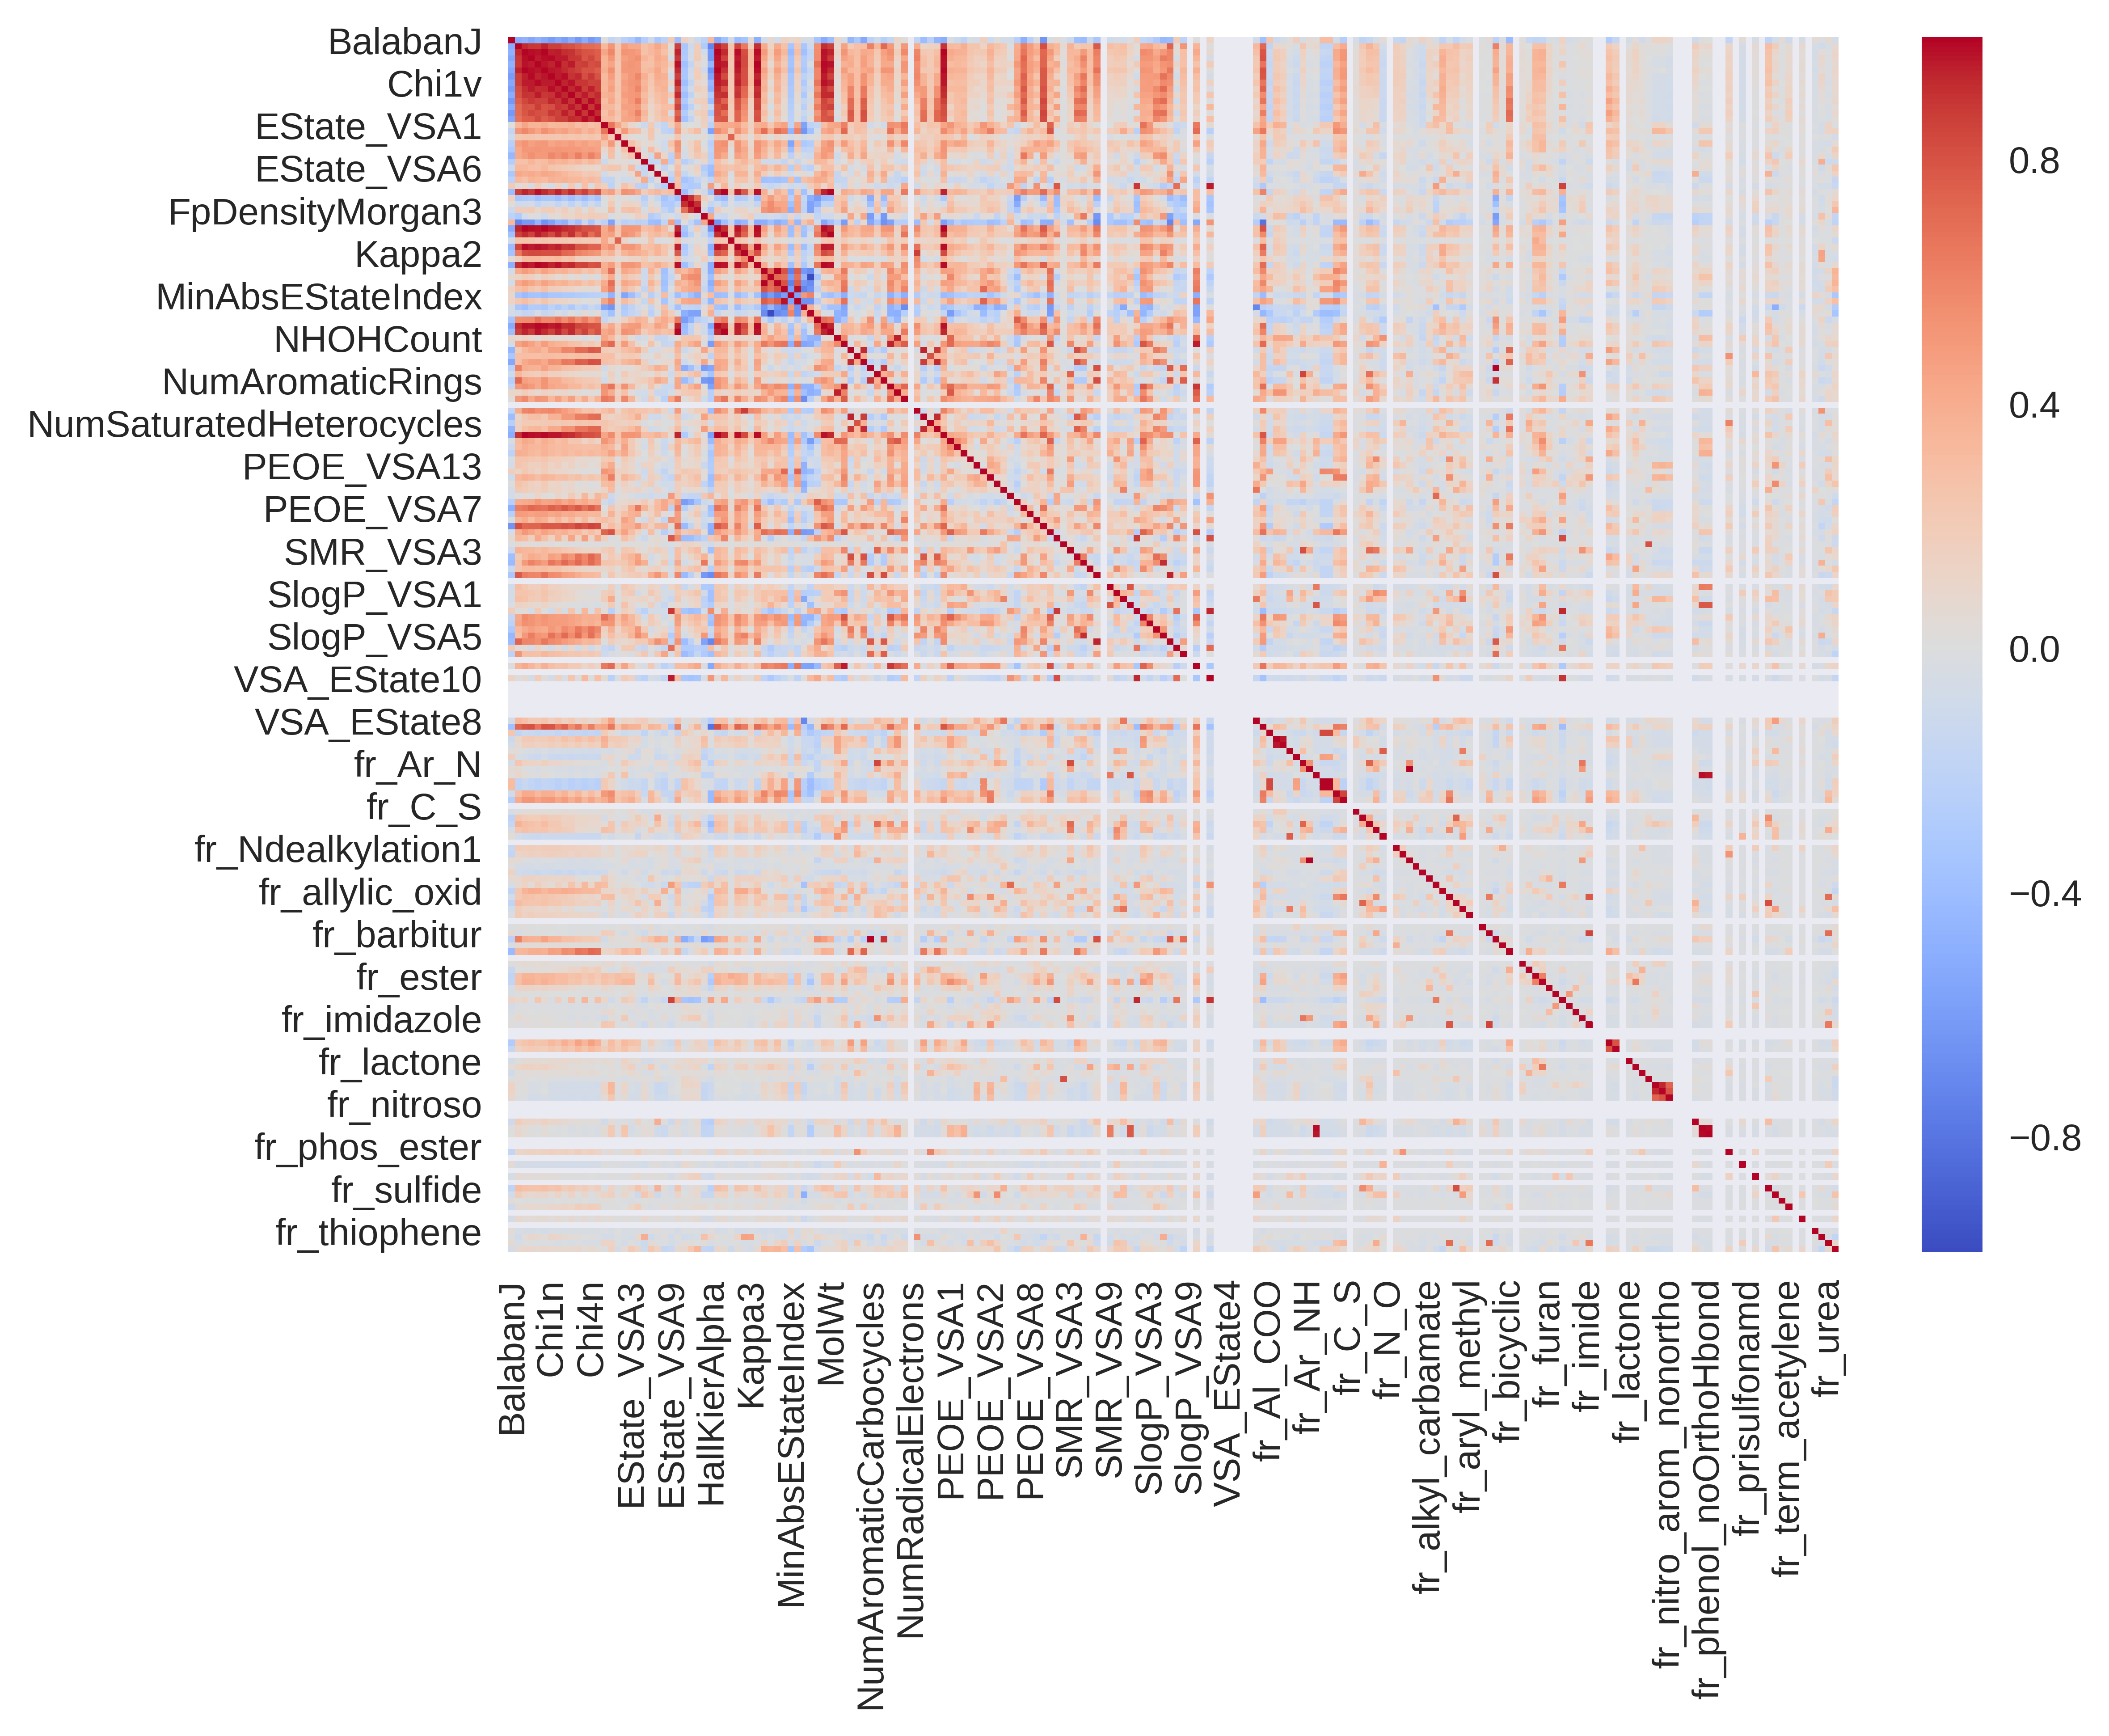

In [8]:
fig, ax = plt.subplots(figsize=(8,6), dpi=600)
sns.heatmap(dataset_clean.drop('MP_Kelvin', axis=1).corr(), cmap='coolwarm')

In [9]:
# Get feature matrix and target variable
X = dataset_clean.drop('MP_Kelvin', axis=1)
y = dataset_clean[['MP_Kelvin']]

Text(0.5,1,'Distribution of MP_Kelvin')

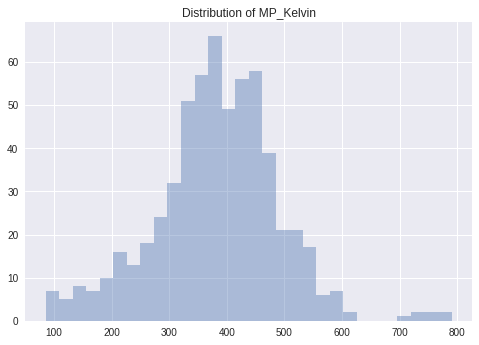

In [10]:
# Get distribution of y
fig, ax = plt.subplots(1,1)
sns.distplot(y, kde=False, bins = 30, ax=ax)
ax.set_title('Distribution of MP_Kelvin')


## Preparation for modelling

In [11]:
# Make a train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
def fit_regression_model(model, X_train, X_test, y_train, y_test):
    from math import sqrt
    
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    # The mean squared error
    print("Root- Mean squared error: %.2f"
      % sqrt(mean_squared_error(y_test, pred)))
    # Explained variance score: 1 is perfect prediction
    print('Variance score: %.2f' % r2_score(y_test, pred))

## Regression using all features

### Linear regression

In [13]:
lr_model = LinearRegression()
fit_regression_model(lr_model, X_train, X_test, y_train, y_test)

Root- Mean squared error: 167758.41
Variance score: -3131859.40


### Decision trees

In [14]:
dt_model = DecisionTreeRegressor()
fit_regression_model(dt_model, X_train, X_test, y_train, y_test)

Root- Mean squared error: 71.80
Variance score: 0.43


# Feature Selection

## Mutual Information

In [15]:
mreg = mutual_info_regression(X_train, y_train)

/home/gcuder/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [16]:
fs_results = pd.DataFrame(data = mreg, index = feature_names, columns=['MI'])

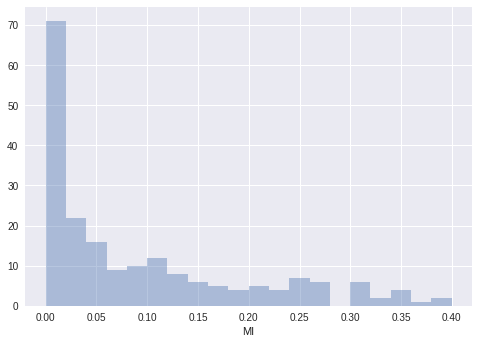

In [17]:
# Distribution of MI
sns.distplot(fs_results['MI'], bins = 20, kde =False)

In [18]:
# Order features in descending order based on the MI
fs_results.sort_values(by='MI', ascending=False, inplace = True)

In [19]:
# Remove features with MI < 0.2 and get feature names
important_features_mi = fs_results[(fs_results.T >=0.1).any()].index

In [20]:
X_mi = X[important_features_mi]
X_mi.shape

(597, 72)

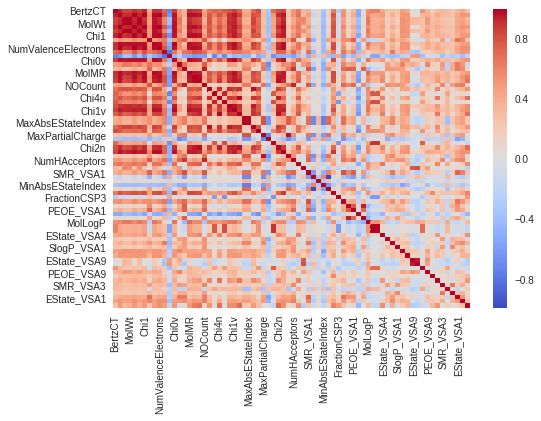

In [21]:
# look at correlation between new features
sns.heatmap(X_mi.corr(), cmap = 'coolwarm')

In [22]:
X_train_mi, X_test_mi, y_train_mi, y_test_mi = train_test_split(X_mi, y, test_size=0.2, random_state=42)

## RFE

In [23]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

In [24]:
estimator = RandomForestRegressor()
selector = RFE(estimator, 60, step=1)
selector.fit(X, y)


/home/gcuder/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RFE(estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
  n_features_to_select=60, step=1, verbose=0)

In [25]:
important_features_rfe = X.T[selector.get_support()].index
X_rfe = X[important_features_rfe]
X_train_rfe, X_test_rfe, y_train_rfe, y_test_rfe = train_test_split(X_rfe, y, test_size=0.2, random_state=42)

# Regression with important features only

## Mutual Information 

In [26]:
lr_model = LinearRegression()
fit_regression_model(lr_model, X_train_mi, X_test_mi, y_train_mi, y_test_mi)

Root- Mean squared error: 63.01
Variance score: 0.56


In [27]:
dt_model = DecisionTreeRegressor(random_state=43)
fit_regression_model(dt_model, X_train, X_test, y_train, y_test)

Root- Mean squared error: 69.83
Variance score: 0.46


## RFE using Random Forest

In [28]:
lr_model = LinearRegression()
fit_regression_model(lr_model, X_train_rfe, X_test_rfe, y_train_rfe, y_test_rfe)

Root- Mean squared error: 58.52
Variance score: 0.62


In [29]:
dt_model = DecisionTreeRegressor(random_state=44)
fit_regression_model(dt_model, X_train_rfe, X_test_rfe, y_train_rfe, y_test_rfe)

Root- Mean squared error: 77.14
Variance score: 0.34


# Notes

* Categorical features start with fr_...; Write function to distinct features based on value range
* Min-Max Scaler on numerical features
* Categorical features: Try to one-hot encode them
* Prepare two datasets. 
    * Linear regression: without categorical features
    * Decision tree: with categorical features
